# Lecture 13: 2023-09-03 Evaluating Language Models

## Overview

In this lecture, we will discuss how to evaluate language models. We have already discussed precision, recall, accuracy, and F1 score. We will introduce the concepts of overfitting, underfitting, generalization, and optimal training scenarios. First, We will refresh our memory on precision, recall, accuracy, and F1 score, and then we will introduce the various training scenarios. To conclude, we will discuss some Cross Validation techniques. We will also introduce the python package _Weights and Biases_.

## Precision, Recall, Accuracy, and F1 Score

### Precision

Precision is the number of true positives divided by the number of true positives plus the number of false positives. It is a measure of the quality of the positive predictions. It is also known as positive predictive value.

$$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$

### Recall

Recall is the number of true positives divided by the number of true positives plus the number of false negatives. It is a measure of the completeness of the positive predictions. It is also known as sensitivity or true positive rate.

$$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$

### Accuracy

Accuracy is the number of true positives plus the number of true negatives divided by the total number of predictions. It is a measure of the overall quality of the predictions.

$$\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{True Positives}+\text{True Negatives}+\text{False Positives}+\text{False Negatives}}$$

### F1 Score

F1 score is the harmonic mean of precision and recall. It is a measure of the overall quality of the positive predictions.

$$\text{F1 Score} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

## Train, Validation, and Test Sets

* Train set: used to train the model - the model learns from this data
* Validation set: used to evaluate the model during training - the model does not learn from this data (but it can be used to tune hyperparameters)
* Test set: used to evaluate the model after training - the model does not learn from this data

## Overfitting, Underfitting, and Generalization

* Overfitting: the model is too complex for the data
* Underfitting: the model is too simple for the data
* Generalization: the model is able to make accurate predictions on new data

____ Resources

* [Underfittng vs. Overfitting](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)

### Overfitting

In [ ]:
# import libraries to generate data
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# generate our data
X, y = make_classification(n_samples=10000, n_features=20, n_redundant=15, n_informative=5, random_state=4)

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# Shape of the data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
# Create Tree depth values
values = [i for i in range(1, 31)]

In [ ]:
train_scores = []
test_scores = []

In [ ]:
# evaluate the decision tree model
for i in values:
    model = DecisionTreeClassifier(max_depth=i, random_state=4)
    
    print(f"[INFO] training model with max_depth = {i}")
    # fit the model
    model.fit(X_train, y_train)
    
    # Evaluate the model
    t_y_hat = model.predict(X_train)
    train_acc = accuracy_score(y_train, t_y_hat)
    train_scores.append(train_acc)
    
    # evaluate on the validation set
    test_y_hat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_hat)
    test_scores.append(test_acc)

In [ ]:
## Let's plot the results
import matplotlib.pyplot as plt
plt.plot(values, train_scores, '-o',  label="train")
plt.plot(values, test_scores, '-o', label="test")
plt.legend()
plt.show()

#### Reasons for Overfitting

* High bias and low variance
* The size of the trainig set
* the model is too complex


#### Bias-Variance Tradeoff

<img src="https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/images/bias_variance/bullseye.png" height="600" width="800">

Image source: https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote12.html

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*h4XETbo3hFx9PtKKJH90Dg.jpeg" height="600" width="800">

Image source: https://medium.com/@rsehrawat75/bias-variance-tradeoff-f0e3afb78879

#### Techniques to prevent overfitting

* Decrease model complexity
* Decrease the number of features
* Increase the size of the training set
* Decrease the training time
* Regularization
* Early stopping

### Underfitting

In [ ]:
import numpy as np

# Generate some random data
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(100) * 0.5

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X)

# Fit linear regression model
model = LinearRegression()
model.fit(X_poly, y)


In [ ]:
import matplotlib.pyplot as plt

# Plot data and model predictions
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X_poly), color='red', linewidth=2)
plt.title('Underfitting Linear Regression Model')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


#### Reasons for Underfitting

* Model is too simple
* Feed better features to the model
* High bias and low variance
* The size of the training set is too small
* Noise in the data

#### Techniques to prevent underfitting

* Increase model complexity
* Increase the number of features (feature engineering)
* Decrease noise in the data
* Increase the number of epochs

## Generalization

We want our mdl to be able to make accurate predictions on new data, and thus we want our model to generalize. To fix the underfitting of the previous model, so it generalize well we can increase the complexity of the model by using a higher degree polynomial.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

# Fit linear regression model
model = LinearRegression()
model.fit(X_poly, y)


In [ ]:
import matplotlib.pyplot as plt

# Plot data and model predictions
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X_poly), color='red', linewidth=2)
plt.title('Improved Linear Regression Model')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


## Summary of Training Scenarios

<img src="https://meditationsonbianddatascience.files.wordpress.com/2017/05/fitgraph.jpg?w=1024" height="600" width="800">

Image source: https://meditationsonbianddatascience.com/2017/05/11/overfitting-underfitting-how-well-does-your-model-fit


## Cross Validation Examples

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import (
    train_test_split,
    TimeSeriesSplit,
    KFold,
    StratifiedKFold,
    GroupKFold,
    StratifiedGroupKFold,
)


In [ ]:
## Source https://www.kaggle.com/code/robikscube/cross-validation-visualized-youtube-tutorial/notebook and Scikit-Learn documentation


from matplotlib.patches import Patch
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(
        range(len(groups)),
        [0.5] * len(groups),
        c=groups,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.scatter(
        range(len(groups)),
        [3.5] * len(groups),
        c=classes,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.set(
        ylim=[-1, 5],
        yticks=[0.5, 3.5],
        yticklabels=["Data\ngroup", "Data\nclass"],
        xlabel="Sample index",
    )


def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=25):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, 100],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax


def plot_cv(cv, X, y, groups, n_splits=5):
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(15, 5))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
        ["Testing set", "Training set"],
        loc=(1.02, 0.8),
    )
    plt.tight_layout()
    fig.subplots_adjust(right=0.7)
    plt.show()
    
def get_fake_X_y():
    # Fake Generate the class/group data for an example
    n_points = 100
    X_ = np.random.randn(100, 10)

    percentiles_classes = [0.1, 0.9]
    y_ = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

    # Evenly spaced groups repeated once
    groups_ = np.hstack([[ii] * 10 for ii in range(10)])
    return X_, y_, groups_

In [ ]:
# create some sample data
X = np.random.randn(100, 10)
y = np.random.randint(0, 3, 100)

#### K-Fold Cross Validation

In [ ]:
# define the number of folds for cross-validation
k = 5

# create an instance of StratifiedKFold
skf = KFold(n_splits=k, shuffle=True)

# create an empty list to store the cross-validation scores
scores = []

In [ ]:
# loop over each fold
for train_index, test_index in skf.split(X, y):
    # split the data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # fit a multinomial logistic regression model on the training data
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
    model.fit(X_train, y_train)

    # make predictions on the testing data
    y_pred = model.predict(X_test)

    # compute the accuracy score of the model on the testing data
    score = accuracy_score(y_test, y_pred)

    # add the score to the list of cross-validation scores
    scores.append(score)

    # Print the k-fold index
    print(f"Fold: {len(scores)}/{k}: Accuracy: {score:.3f}")
    
# compute the mean and standard deviation of the cross-validation scores
mean_score = np.mean(scores)
std_score = np.std(scores)

# print the mean and standard deviation of the cross-validation scores
print(f"Mean accuracy: {mean_score:.3f}, Standard deviation: {std_score:.3f}")

In [ ]:
kf = KFold()
X_, y_, groups_ = get_fake_X_y()
plot_cv(KFold, X_, y_, groups_)

#### Stratified K-Fold Cross Validation

Stratified K-Fold Cross Validation is a variation of K-Fold Cross Validation. It is used when the data is imbalanced. It is used to split the data into K folds, and then it is used to train the model K times. Each time, a different fold is used as the validation set, and the remaining folds are used as the training set. The final score is the average of the K scores.

In [ ]:
# define the number of folds for cross-validation
k = 5

# create an instance of StratifiedKFold
skf = StratifiedKFold(n_splits=k, shuffle=True)

# create an empty list to store the cross-validation scores
scores = []

In [ ]:
# loop over each fold
for train_index, test_index in skf.split(X, y):
    # split the data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # fit a multinomial logistic regression model on the training data
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
    model.fit(X_train, y_train)

    # make predictions on the testing data
    y_pred = model.predict(X_test)

    # compute the accuracy score of the model on the testing data
    score = accuracy_score(y_test, y_pred)

    # add the score to the list of cross-validation scores
    scores.append(score)

    # Print the k-fold index
    print(f"Fold: {len(scores)}/{k}: Accuracy: {score:.3f}")
    
# compute the mean and standard deviation of the cross-validation scores
mean_score = np.mean(scores)
std_score = np.std(scores)

# print the mean and standard deviation of the cross-validation scores
print(f"Mean accuracy: {mean_score:.3f}, Standard deviation: {std_score:.3f}")

In [ ]:
skf = StratifiedKFold()
X_, y_, groups_ = get_fake_X_y()
plot_cv(StratifiedKFold, X_, y_, groups_)

#### Group K-Fold Cross Validation

Group K-Fold Cross Validation is a variation of K-Fold Cross Validation. It is used when the data is grouped. It is used to split the data into K folds, and then it is used to train the model K times.

In [ ]:
# define the number of folds for cross-validation
k = 5

# create an instance of StratifiedKFold
skf = GroupKFold(n_splits=k)

# create an empty list to store the cross-validation scores
scores = []

# groups
groups = np.hstack([[ii] * 10 for ii in range(10)])
groups

In [ ]:
# loop over each fold
for train_index, test_index in skf.split(X, y, groups=groups):
    # split the data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # fit a multinomial logistic regression model on the training data
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
    model.fit(X_train, y_train)

    # make predictions on the testing data
    y_pred = model.predict(X_test)

    # compute the accuracy score of the model on the testing data
    score = accuracy_score(y_test, y_pred)

    # add the score to the list of cross-validation scores
    scores.append(score)

    # Print the k-fold index
    print(f"Fold: {len(scores)}/{k}: Accuracy: {score:.3f}")
    
# compute the mean and standard deviation of the cross-validation scores
mean_score = np.mean(scores)
std_score = np.std(scores)

# print the mean and standard deviation of the cross-validation scores
print(f"Mean accuracy: {mean_score:.3f}, Standard deviation: {std_score:.3f}")

In [ ]:
gskf = StratifiedGroupKFold()
X_, y_, groups_ = get_fake_X_y()
np.random.shuffle(y_)
plot_cv(StratifiedGroupKFold, X_, y_, groups_)

## Weights and Biases

_Weights and Biases_ is a free to use python package and website. It's a great resource for tracking your machine learning and neural network experiments. It is used to track the hyperparameters, metrics, and artifacts of your experiments. It is also used to compare the results of different experiments. It is also used to visualize the results of your experiments. It is also used to share the results of your experiments.

https://wandb.ai/home



### Demonstration of Weights and Biases with a Neural Network

In [ ]:
# we will use tensorflow and work with the MNIST dataset
import wandb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


#### Let's create our dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
## examine the data
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
x_train[0]

In [ ]:
## Let's look at some of the images
import random
import matplotlib.pyplot as plt

# create a subplot 5x5 with random images
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.flatten()
for ax in axes:
    img = random.choice(x_train)
    ax.imshow(img, cmap='gray')
    ax.axis('off')

#### Model our data for a neural network

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

#### Create a neural network

In [ ]:
def create_model():
    model = keras.Sequential(
        [
            layers.InputLayer(input_shape=(28, 28, 1)),
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dropout(0.5),
            layers.Dense(10, activation="softmax"),
        ]
    )
    return model


In [ ]:
#### Print the model summary
model = create_model()
model.summary()

#### Define our hyperparameters

In [ ]:
hyperparams = {
    "learning_rate": 0.001,
    "batch_size": 128,
    "epochs": 10
}


#### Compile our model

In [ ]:
wandb.init(project="mnist-classification", config=hyperparams)

model = create_model()

optimizer = tf.keras.optimizers.Adam(learning_rate=hyperparams["learning_rate"])

model.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)

callbacks = [
    wandb.keras.WandbCallback(save_model=False)
]

#### Train our model

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size=hyperparams["batch_size"],
    epochs=hyperparams["epochs"],
    validation_data=(x_test, y_test),
    callbacks=callbacks,
)

wandb.log({"val_loss": history.history["val_loss"][-1], "val_accuracy": history.history["val_accuracy"][-1]})


313/313 [==============================] - 0s 950us/step


<AxesSubplot: >

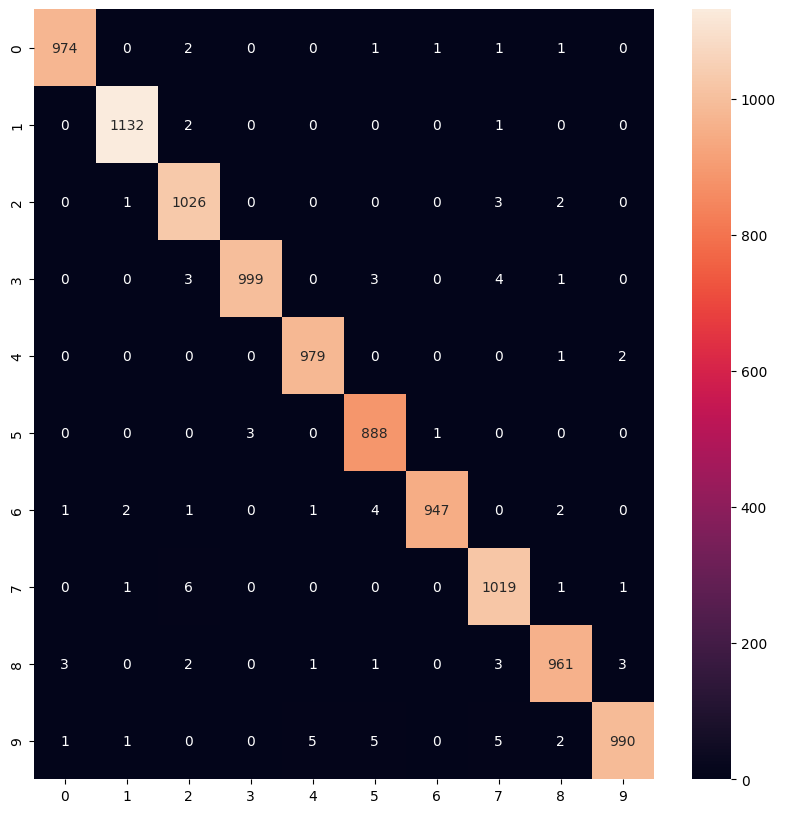

In [122]:
## Let's look at a confusion matrix of our predictions
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test.argmax(axis=1), model.predict(x_test).argmax(axis=1))

## Let's plot the confusion matrix
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(cfm, annot=True, fmt="d")

#### Exploring MNIST in Embeddings Projector

[Embeddings Projector](https://projector.tensorflow.org/)